<a href="https://colab.research.google.com/github/Vedika2203/GRIP-TSF-Internship/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forming a Simple Linear Rergression Model

-Importing libraries-

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline

-Import dataset-

In [ ]:
url="http://bit.ly/w-data"
db=pd.read_csv(url)
data=db
print("The data is imported successfully")
db

The data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
db.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


-Plotting a scatter plot-

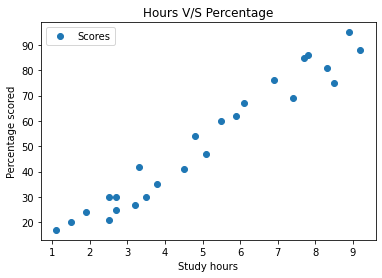

In [ ]:
db.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours V/S Percentage')  
plt.xlabel('Study hours')  
plt.ylabel('Percentage scored')  
plt.show()

-Interpretation of the graph-
From the above graph we can see that there is a positive linear relationship between the hours studied and percentage scored by the students. 

-Linear regression model-

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
#splitting the dataset
x=db.iloc[:,:-1].values
y=db.iloc[:,1].values
x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.80,test_size=0.20,random_state=0)

-Training model-

In [ ]:
from sklearn.linear_model import LinearRegression
LinearRegressor= LinearRegression()
LinearRegressor.fit(x_train, y_train)
y_predict= LinearRegressor.predict(x_train)
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


-Plotting the regression line- 

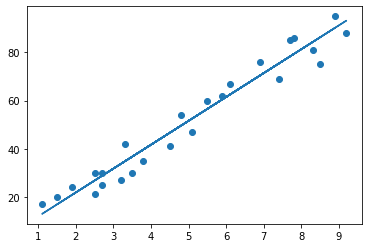

In [ ]:
line = regressor.coef_*x+regressor.intercept_


# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

-Making predictions- 

In [ ]:
print(x_test) #Testing data - In Hours
y_pred = regressor.predict(x_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


-Checking the accuracy of both sets-

In [ ]:
print('Test Score')
print(regressor.score(x_test, y_test))
print('Training Score')
print(regressor.score(x_train, y_train))

Test Score
0.9454906892105354
Training Score
0.9515510725211553


-Making Predictions-

In [ ]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred})  
df 

,Actual values,Predicted values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#Predicted score if a student studies for 9.25 hrs/day
print('Score of student who studied for 9.25 hours a dat', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [93.69173249]


-Model Evaluation-

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
